In [102]:
with open("tweets.txt", mode="r", encoding="utf-8") as fp:
    lines=fp.readlines()
    print (type(lines))

<class 'list'>


In [103]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


In [104]:

def load_data(path,file_name):

    documents_list = []
    titles=[]
    with open("tweets.txt", mode="r", encoding="utf-8") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

In [105]:
def preprocess_data(doc_set):

        tokenizer = RegexpTokenizer(r'\w+')
        sp_stop = set(stopwords.words('spanish'))
        p_stemmer = PorterStemmer()
        texts = []

        for i in doc_set:
            raw = i.lower()
            tokens = tokenizer.tokenize(raw)
            stopped_tokens = [i for i in tokens if not i in sp_stop]
            stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
            texts.append(stemmed_tokens)

        return texts

In [106]:
def prepare_corpus(doc_clean):

    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary,doc_term_matrix

In [107]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [108]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [109]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [110]:
# LSA Model
number_of_topics=7
words=10
document_list,titles=load_data("","articles.txt")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

Total Number of Documents: 9703
[(0, '0.635*"n" + 0.522*"raeinforma" + 0.477*"dudara" + 0.106*"gracia" + 0.097*"correcto" + 0.085*"si" + 0.082*"palabra" + 0.070*"correcta" + 0.066*"hola" + 0.060*"cuál"'), (1, '0.767*"n" + -0.445*"raeinforma" + -0.386*"dudara" + -0.109*"gracia" + -0.091*"si" + -0.088*"correcto" + -0.086*"palabra" + -0.064*"decir" + -0.032*"http" + -0.032*"duda"'), (2, '-0.556*"co" + -0.554*"t" + -0.528*"http" + 0.131*"gracia" + 0.105*"correcto" + 0.104*"decir" + 0.099*"palabra" + 0.087*"cuál" + -0.078*"si" + 0.058*"correcta"'), (3, '-0.694*"correcto" + -0.418*"decir" + 0.377*"palabra" + 0.259*"correcta" + 0.237*"si" + 0.145*"cuál" + 0.113*"forma" + -0.066*"uso" + 0.065*"saber" + 0.057*"gracia"'), (4, '-0.730*"si" + -0.288*"gracia" + -0.271*"palabra" + 0.260*"raeinforma" + -0.234*"correcto" + 0.203*"correcta" + 0.177*"cuál" + -0.136*"decir" + -0.131*"saber" + 0.115*"forma"'), (5, '-0.592*"palabra" + 0.568*"gracia" + 0.327*"correcta" + 0.232*"cuál" + 0.178*"forma" + 0.149

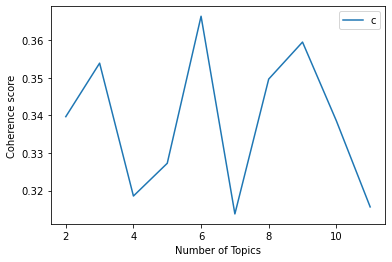

In [111]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)